# Relatório de Análise VII

## Identificando e Removendo Outliers Utilizando a Técnica do Box-Plot

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

In [4]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


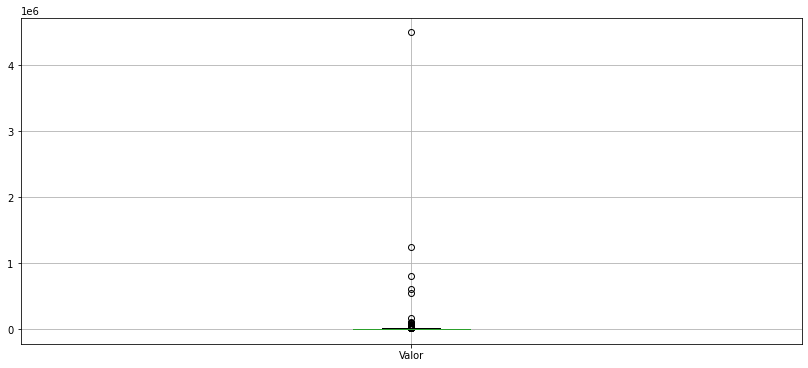

In [5]:
dados.boxplot(['Valor'])

In [6]:
#visualizando outliers
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [10]:
#gerando uma Series
valor = dados['Valor']

<img src="box-plot.png" width=70%>

In [13]:
#calculando as variáveis conforme boxplot de exemplo 
Q1 = valor.quantile(.25) #primeiro quartil
Q3 = valor.quantile(.75) # terceiro quartil
IIQ = Q3 - Q1 #intervalo inter-quartis
limite_inferior = Q1 - 1.5 * IIQ #limite inferior
limite_superior = Q3 + 1.5 * IIQ #limite superior


In [14]:
#selecionando os valores dentro dos limites e fazendo um dataframe sem os outliers
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

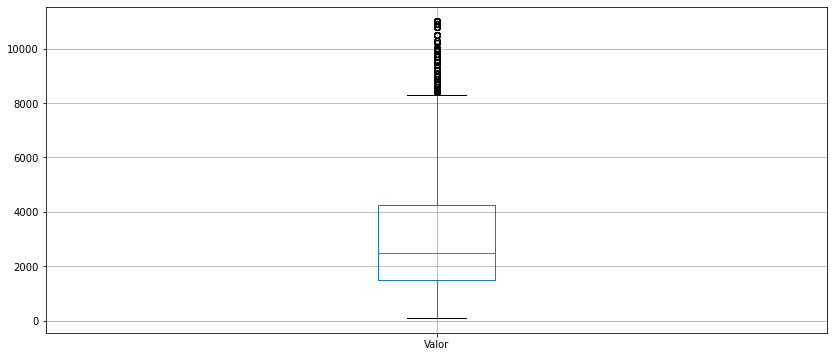

In [15]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243F0CDD408>]],
      dtype=object)

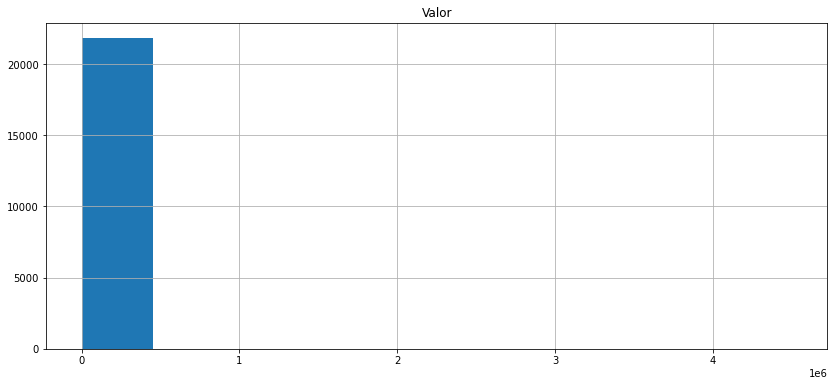

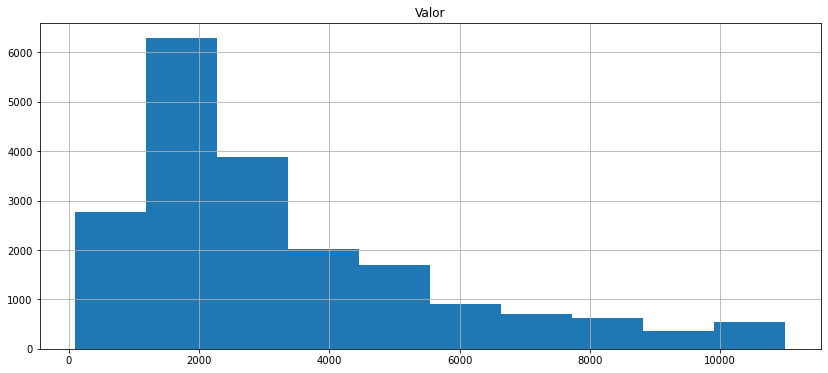

In [16]:
#comparando as frequências antes e depois de tirar os outliers
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers (continuação)

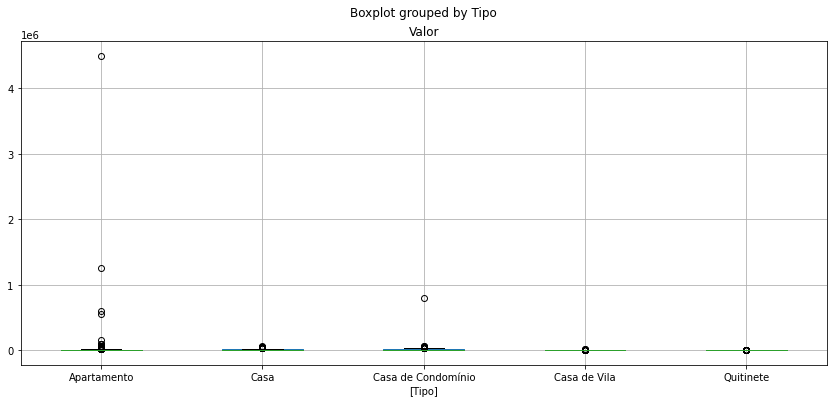

In [19]:
#fazendo visualização por grupos
dados.boxplot(['Valor'], by=['Tipo'])

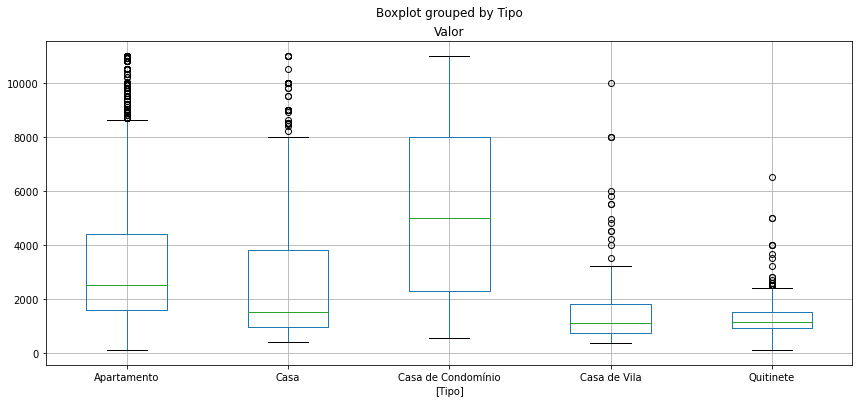

In [20]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [22]:
#criando um agrupamento por tipo só para a variável valor (gera uma série groupby)
grupo_tipo = dados.groupby('Tipo')['Valor']

In [23]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [25]:
#cria um dicionário com os índices por grupo
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [26]:
#criando as estatísticas do boxplot
#calculando as variáveis conforme boxplot de exemplo 
Q1 = grupo_tipo.quantile(.25) #primeiro quartil
Q3 = grupo_tipo.quantile(.75) # terceiro quartil
IIQ = Q3 - Q1 #intervalo inter-quartis
limite_inferior = Q1 - 1.5 * IIQ #limite inferior
limite_superior = Q3 + 1.5 * IIQ #limite superior

In [27]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [28]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [29]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [30]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [31]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [32]:
#selecionando o limite superior de um dos grupos da series
limite_superior['Apartamento']

9950.0

In [33]:
limite_superior['Casa']

22850.0

<img src="box-plot.png" width=70%>

In [34]:
#argumento keys para a série
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


In [35]:
#usar um laço para selecionar por variável - seleção mais fina, verificando os limites por grupo de imóveis
dados_new_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite #criando a seleção
    dados_selecao = dados[selecao] #criando um DF novo
    dados_new_new = pd.concat([dados_new_new, dados_selecao]) #concatenando os dados num novo DataFrame
    

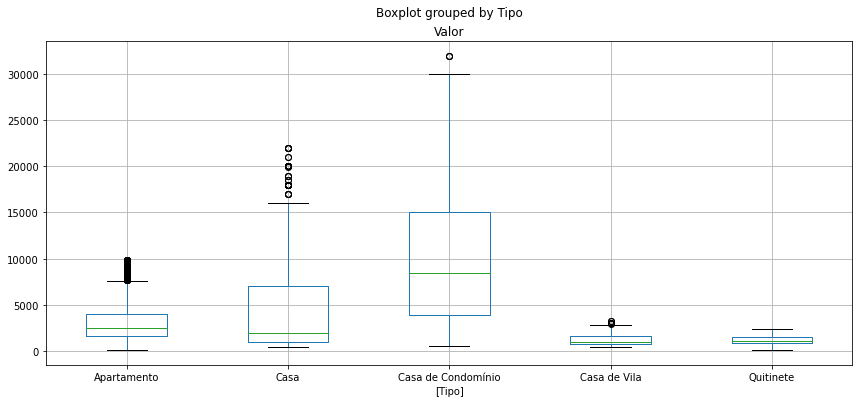

In [36]:
dados_new_new.boxplot(['Valor'], by=['Tipo'])

In [37]:
#salvando nosso novo df
dados_new_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)